In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import seaborn as sns # statistical data visualization
from scipy.special import logit, expit

In [5]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
# load and preview data
df = pd.read_csv('Admission_Predict.csv')
df.head()

data_x = df[df.columns[1:8]]
data_y = df.iloc[:, 8]
# print(data_x)
# print(data_y)

# Y = expit(data_y)
# Y = logit(data_y)
Y = data_y
# print(Y)

#  traning and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.2, random_state=1)

In [7]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
# build random forest
forest = RandomForestRegressor(n_estimators=1000,
                               criterion='mse',
#                                random_state=1,
                               n_jobs=-1)
# train random forest
forest.fit(X_train, y_train)
# y_train_pred = forest.predict(X_train)
y_pred = forest.predict(X_test)

# print(model.predict(X_train))
# print(y_train)

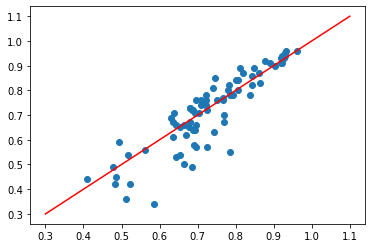

In [8]:
# draw
import matplotlib.pyplot as plt # data visualization
from matplotlib.pyplot import Line2D
# add line
a = 0.3
b = 1.2
x1=np.arange(a,b,0.1)
y1=np.arange(a,b,0.1)
plt.plot(x1,y1,'r')
plt.scatter(y_pred,y_test)
plt.show()

In [9]:
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("mae:", mean_absolute_error(y_test, y_pred))
print("mse:", mean_squared_error(y_test, y_pred))
print("rmse:", sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score:", r2_score(y_test, y_pred))

mae: 0.05043075000000019
mse: 0.005233035787500023
rmse: 0.07233972482322575
r2 score: 0.7737304105783434


In [12]:
# Predict testing
y_new = forest.predict(np.array([330,117,4,4,4,8.9,1]).reshape(-1, 7))
print(y_new)

[0.80765]
